# **Space X  Falcon 9 First Stage Landing Prediction**


## Building a Machine Learning Prediction Model


In this notebook, we will build a **machine learning pipeline** to predict whether the Falcon 9 first stage will successfully land. We will combine data preparation, model training, hyperparameter tuning, and evaluation into a structured workflow.

## Learning Objectives


Perform **Exploratory Data Analysis (EDA)** and define Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


We will import the following libraries for the lab


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

import warnings
warnings.filterwarnings("ignore")

This function is to plot the confusion matrix.


In [2]:

    # This function plots the confusion matrix with a clean blue theme.
def visualize_confusion_matrix(y, y_predict):
    from sklearn.metrics import confusion_matrix
    import seaborn as sns
    import matplotlib.pyplot as plt

    cm = confusion_matrix(y, y_predict)
    ax = plt.subplot()
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax,
                linewidths=0.5, linecolor='gray')
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")
    ax.set_title("Confusion Matrix")
    plt.show()


## Load the dataframe


Load the data


In [3]:
URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
data = pd.read_csv(URL1)


In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [5]:
URL2 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv"
X = pd.read_csv(URL2)

In [6]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


**Explanation:** Create a NumPy array from the column `Class` in `data`, by applying the method `to_numpy()` then assign it to the variable `Y`,make sure the output is a Pandas series (only one bracket df\['name of column']).

Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
Y = data['Class'].to_numpy()

**Explanation:** Standardize the data in `X` then reassign it to the variable `X` using the transform provided below.

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
transform = preprocessing.StandardScaler()
X = transform.fit(X).transform(X)

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


**Explanation:** Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to 0.2 and random_state to 2. The training data and test data should be assigned to the following label…

Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [10]:
Y_test.shape

(18,)

**Explanation:** Create a logistic regression object then create a GridSearchCV object `logreg_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [11]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [12]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
logreg_cv = GridSearchCV(estimator=lr, cv=10, param_grid=parameters).fit(X_train, Y_train)

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [13]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8464285714285713


**Explanation:** Calculate the accuracy on the test data using the method `score`:

Calculate the accuracy on the test data using the method <code>score</code>:


In [14]:
logreg_score = logreg_cv.score(X_test, Y_test)
print("Test Accuracy:", logreg_score)


Test Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


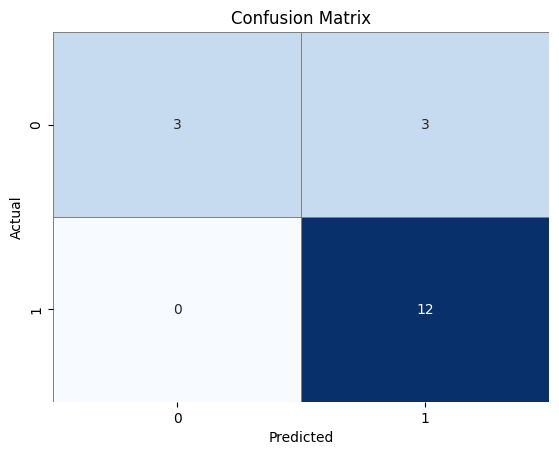

In [15]:
logreg_yhat = logreg_cv.predict(X_test)
visualize_confusion_matrix(Y_test, logreg_yhat)


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the major problem is false positives.


**Explanation:** Create a support vector machine object then create a `GridSearchCV` object `svm_cv` with cv - 10. Fit the object to find the best parameters from the dictionary `parameters`.

Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv - 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()
svm_cv = GridSearchCV(estimator=svm, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [17]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}
accuracy : 0.8482142857142856


**Explanation:** Calculate the accuracy on the test data using the method `score`:

Calculate the accuracy on the test data using the method <code>score</code>:


In [18]:
svm_cv_score = svm_cv.score(X_test, Y_test)
print("Test Accuracy:", svm_cv_score)


Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


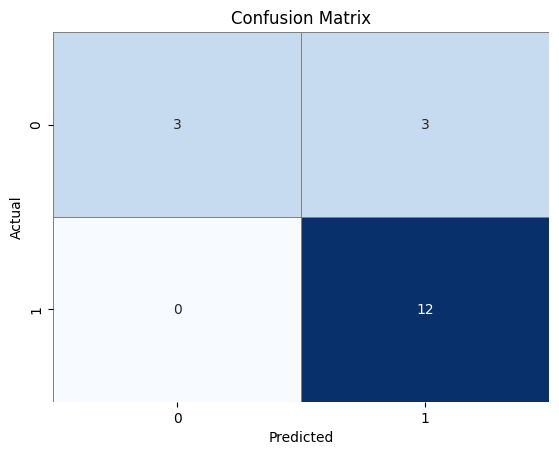

In [19]:
svm_yhat = svm_cv.predict(X_test)
visualize_confusion_matrix(Y_test, svm_yhat)


**Explanation:** Create a decision tree classifier object then create a `GridSearchCV` object `tree_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [20]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()
tree_cv = GridSearchCV(estimator=tree, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [21]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
accuracy : 0.8767857142857143


**Explanation:** Calculate the accuracy of tree_cv on the test data using the method `score`:

Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


In [22]:
tree_cv_score = tree_cv.score(X_test, Y_test)
print("Test Accuracy:", tree_cv_score)


Test Accuracy: 0.8888888888888888


We can plot the confusion matrix


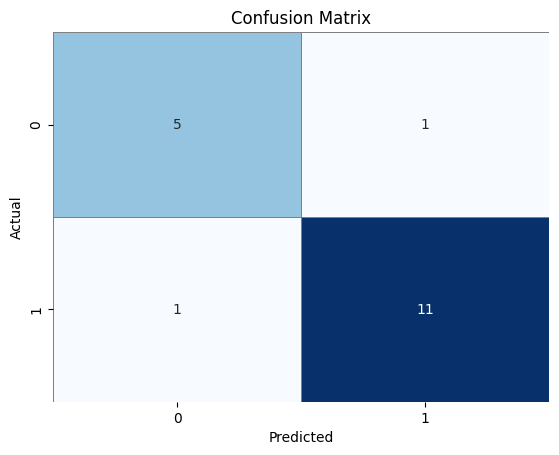

In [23]:
tree_yhat = tree_cv.predict(X_test)
visualize_confusion_matrix(Y_test, tree_yhat)


**Explanation:** Create a k nearest neighbors object then create a `GridSearchCV` object `knn_cv` with cv = 10. Fit the object to find the best parameters from the dictionary `parameters`.

Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [24]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()
knn_cv = GridSearchCV(estimator=KNN, cv=10, param_grid=parameters).fit(X_train, Y_train)

In [25]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}
accuracy : 0.8482142857142858


**Explanation:** Calculate the accuracy of knn_cv on the test data using the method `score`:

Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


In [26]:
knn_cv_score = knn_cv.score(X_test, Y_test)
print("Test Accuracy:", knn_cv_score)


Test Accuracy: 0.8333333333333334


We can plot the confusion matrix


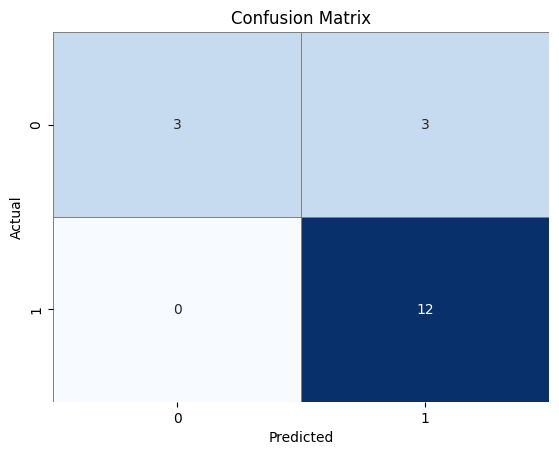

In [27]:
knn_yhat = knn_cv.predict(X_test)
visualize_confusion_matrix(Y_test, knn_yhat)


**Explanation:** Find the method performs best:

Find the method performs best:


In [28]:
accuracy = [svm_cv_score, logreg_score, knn_cv_score, tree_cv_score]
accuracy = [i * 100 for i in accuracy]

method = ['Support Vector Machine', 'Logistic Regression', 'K Nearest Neighbour', 'Decision Tree']
models = {'ML Method':method, 'Accuracy Score (%)':accuracy}

ML_df = pd.DataFrame(models)
ML_df

,ML Method,Accuracy Score (%)
0,Support Vector Machine,83.333333
1,Logistic Regression,83.333333
2,K Nearest Neighbour,83.333333
3,Decision Tree,88.888889


In [29]:
from sklearn.metrics import jaccard_score, f1_score

# Examining the scores from Test sets
jaccard_scores = [
                  jaccard_score(Y_test, logreg_yhat, average='binary'),
                  jaccard_score(Y_test, svm_yhat, average='binary'),
                  jaccard_score(Y_test, tree_yhat, average='binary'),
                  jaccard_score(Y_test, knn_yhat, average='binary'),
                 ]

f1_scores = [
             f1_score(Y_test, logreg_yhat, average='binary'),
             f1_score(Y_test, svm_yhat, average='binary'),
             f1_score(Y_test, tree_yhat, average='binary'),
             f1_score(Y_test, knn_yhat, average='binary'),
            ]

accuracy = [logreg_score, svm_cv_score, tree_cv_score, knn_cv_score]

scores_test = pd.DataFrame(np.array([jaccard_scores, f1_scores, accuracy]), index=['Jaccard_Score', 'F1_Score', 'Accuracy'] , columns=['LogReg', 'SVM', 'Tree', 'KNN'])
scores_test

,LogReg,SVM,Tree,KNN
Jaccard_Score,0.800000,0.800000,0.846154,0.800000
F1_Score,0.888889,0.888889,0.916667,0.888889
Accuracy,0.833333,0.833333,0.888889,0.833333


In [30]:
models = {'KNeighbors':knn_cv.best_score_,
              'DecisionTree':tree_cv.best_score_,
              'LogisticRegression':logreg_cv.best_score_,
              'SupportVector': svm_cv.best_score_}

bestalgorithm = max(models, key=models.get)
print('Best model is', bestalgorithm,'with a evaluate_model of', models[bestalgorithm])
if bestalgorithm == 'DecisionTree':
    print('Best params is :', tree_cv.best_params_)
if bestalgorithm == 'KNeighbors':
    print('Best params is :', knn_cv.best_params_)
if bestalgorithm == 'LogisticRegression':
    print('Best params is :', logreg_cv.best_params_)
if bestalgorithm == 'SupportVector':
    print('Best params is :', svm_cv.best_params_)

Best model is DecisionTree with a evaluate_model of 0.8767857142857143
Best params is : {'criterion': 'entropy', 'max_depth': 16, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}
